In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [2]:
df = pd.read_csv("./laptop_price.csv", encoding="latin-1")

In [3]:
df.sample(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
400,407,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2.2kg,306.0
206,210,Dell,Inspiron 3567,Notebook,15.6,Touchscreen 1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,439.0
1279,1297,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,899.0
75,77,Asus,FX503VD-E4022T (i7-7700HQ/8GB/1TB/GeForce,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.2kg,949.0
580,587,Mediacom,SmartBook Edge,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Celeron Quad Core N3450 1.1GHz,4GB,32GB SSD,Intel HD Graphics 500,Windows 10,1.45kg,389.0


In [4]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(1303, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [8]:
df.describe(exclude="number").T

,count,unique,top,freq
Company,1303,19,Dell,297
Product,1303,618,XPS 13,30
TypeName,1303,6,Notebook,727
ScreenResolution,1303,40,Full HD 1920x1080,507
Cpu,1303,118,Intel Core i5 7200U 2.5GHz,190
Ram,1303,9,8GB,619
Memory,1303,39,256GB SSD,412
Gpu,1303,110,Intel HD Graphics 620,281
OpSys,1303,9,Windows 10,1072
Weight,1303,179,2.2kg,121


In [9]:
for i in range(len(df["Weight"])):
    df.loc[i, "Weight"] = df.loc[i, "Weight"][:-2]
df.loc[:, "Weight"] = df.loc[:, "Weight"].astype("float")

C:\Users\dhoni\AppData\Local\Temp\ipykernel_5928\4162820238.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "Weight"] = df.loc[:, "Weight"].astype("float")


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,660.155794,381.172104,1.00,331.5,659.00,990.50,1320.0
Inches,1303.0,15.017191,1.426304,10.10,14.0,15.60,15.60,18.4
Weight,1303.0,2.038734,0.665475,0.69,1.5,2.04,2.30,4.7
Price_euros,1303.0,1123.686992,699.009043,174.00,599.0,977.00,1487.88,6099.0


In [11]:
df.describe(exclude="number").T

,count,unique,top,freq
Company,1303,19,Dell,297
Product,1303,618,XPS 13,30
TypeName,1303,6,Notebook,727
ScreenResolution,1303,40,Full HD 1920x1080,507
Cpu,1303,118,Intel Core i5 7200U 2.5GHz,190
Ram,1303,9,8GB,619
Memory,1303,39,256GB SSD,412
Gpu,1303,110,Intel HD Graphics 620,281
OpSys,1303,9,Windows 10,1072


* Product have high unique value and TypeName have low unique value
* So much users use windows 10 with frequency 1072
* The most product that people use is XPS 13
* We can use TypeName as the type of product

In [12]:
model_no_grp = df.groupby("TypeName", axis=0)

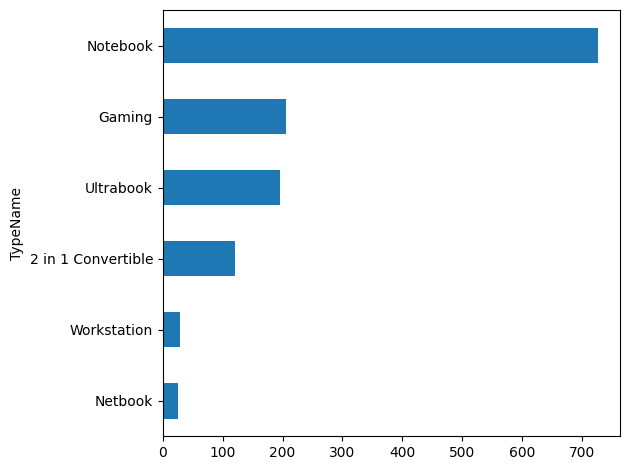

In [13]:
model_no_grp.size().sort_values().plot.barh()
plt.tight_layout()
plt.show()

* So much users use Notebook in this data and just little users who use Netbook

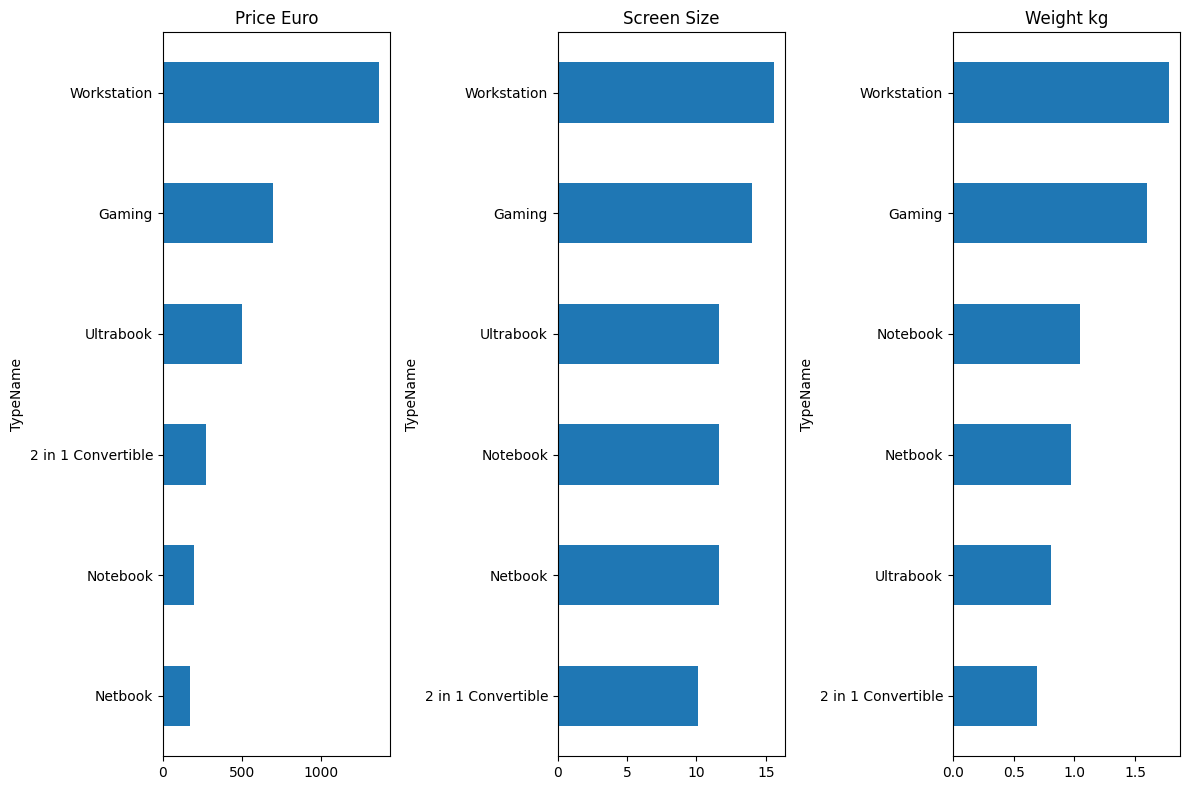

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))
model_no_grp.min()["Price_euros"].sort_values().plot.barh(ax=ax[0])
model_no_grp.min()["Inches"].sort_values().plot.barh(ax=ax[1])
model_no_grp.min()["Weight"].sort_values().plot.barh(ax=ax[2])
ax[0].set_title("Price Euro")
ax[1].set_title("Screen Size")
ax[2].set_title("Weight kg")
plt.tight_layout()
plt.show()

* The minimum price, screen size, and weight of Workstation is higher than the other
* The minimum price of Netbook is lower than the other but the minimum screen size of Netbook is higher than 2 in 1 Convertible and the minimum weight of Netbook is higher than Ultrabook and 2 in 1 Convertible
* 2 in Convertible is the type that has higher minimum price than Notebook and Netbook but this type is the lowest minimum screen size and weight

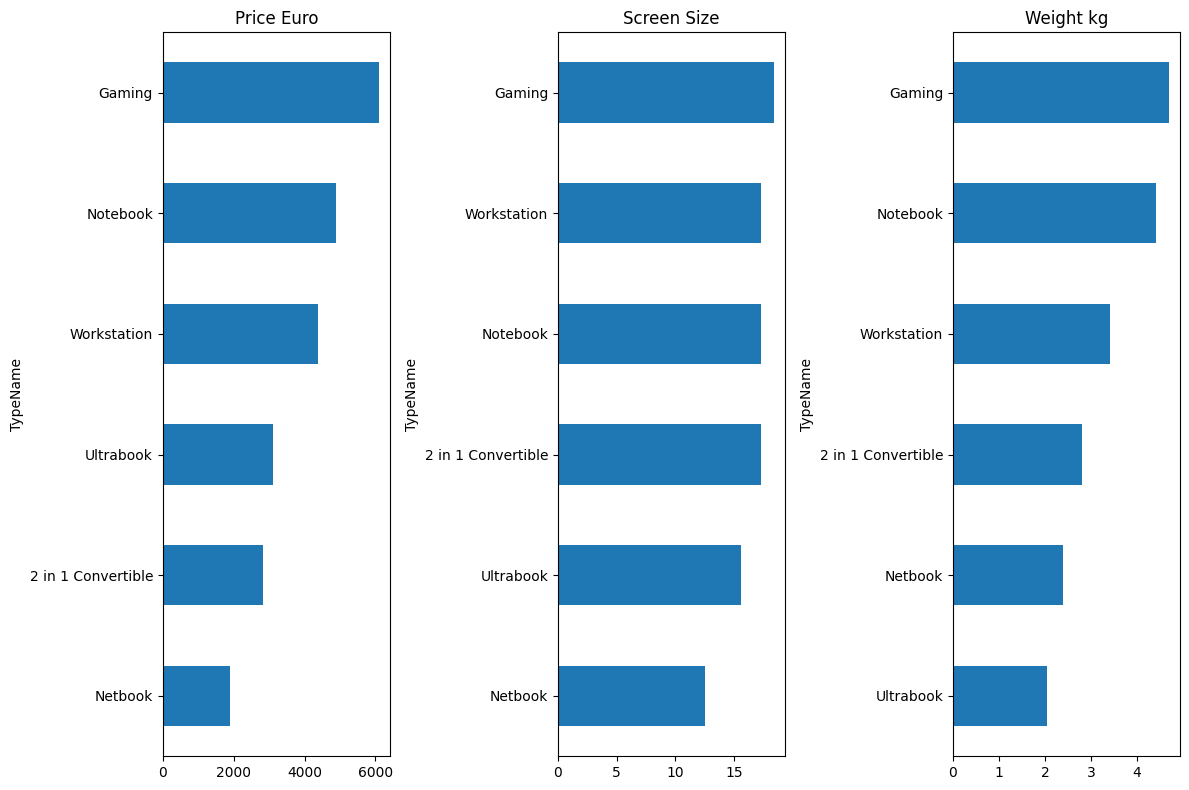

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))
model_no_grp.max()["Price_euros"].sort_values().plot.barh(ax=ax[0])
model_no_grp.max()["Inches"].sort_values().plot.barh(ax=ax[1])
model_no_grp.max()["Weight"].sort_values().plot.barh(ax=ax[2])

ax[0].set_title("Price Euro")
ax[1].set_title("Screen Size")
ax[2].set_title("Weight kg")
plt.tight_layout()
plt.show()

* The maximum of price, screen size, and weight is Gaming type
* Workstation is the highest minimum price, screen size, and weight than the other but has lower maximum price, screen size, and weight than Gaming
* Netbook is the lowest maximum price and screen size but this type has higher maximum weight than Ultrabook
* Ultrabook has higher maximum price than 2 in 1 Convertible and Netbook, but this type has lower screen size than 2 in 1 Convertible and higher than Netbook and this type is the lowest weight

C:\Users\dhoni\AppData\Local\Temp\ipykernel_5928\2493943189.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  model_no_grp.mean()["Price_euros"].sort_values().plot.barh(ax=ax[0])
C:\Users\dhoni\AppData\Local\Temp\ipykernel_5928\2493943189.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  model_no_grp.mean()["Inches"].sort_values().plot.barh(ax=ax[1])
C:\Users\dhoni\AppData\Local\Temp\ipykernel_5928\2493943189.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only co

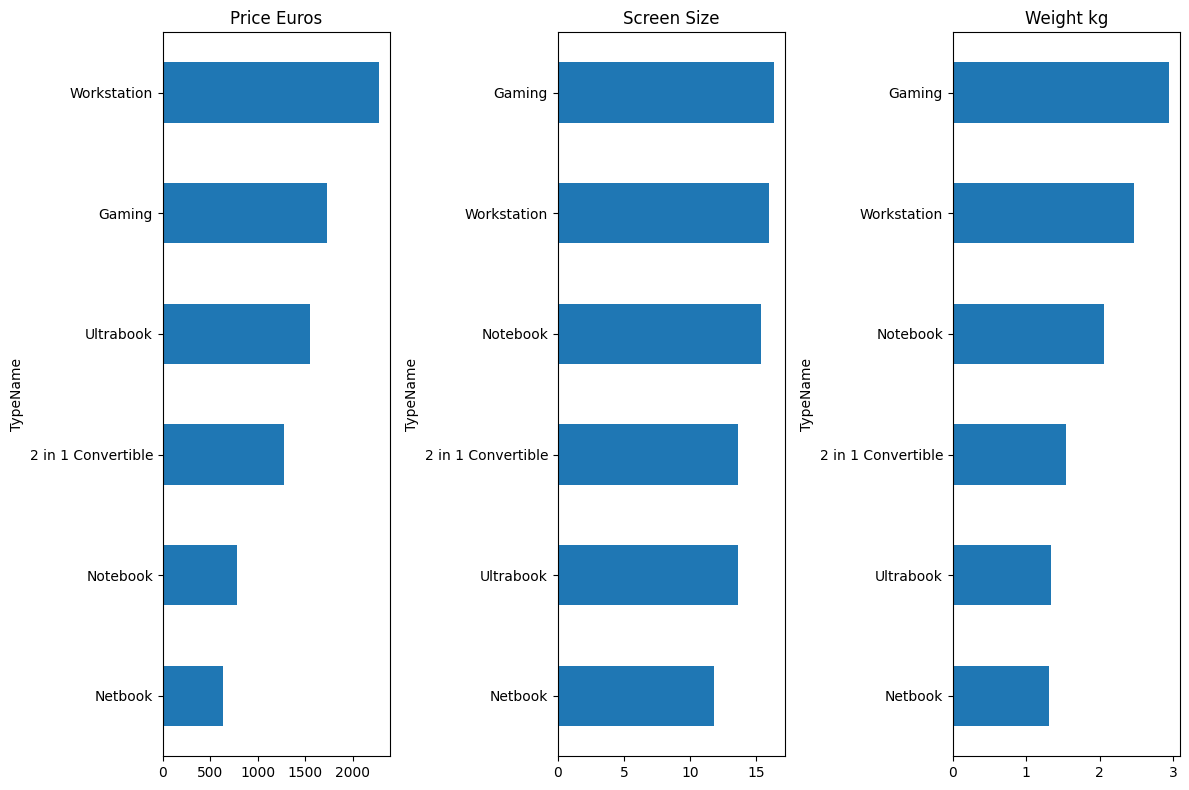

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))
model_no_grp.mean()["Price_euros"].sort_values().plot.barh(ax=ax[0])
model_no_grp.mean()["Inches"].sort_values().plot.barh(ax=ax[1])
model_no_grp.mean()["Weight"].sort_values().plot.barh(ax=ax[2])

ax[0].set_title("Price Euros")
ax[1].set_title("Screen Size")
ax[2].set_title("Weight kg")
plt.tight_layout()
plt.show()

* Workstation is the highest average price but has lower average screen size and weight than Gaming type
* Netbook is the lowest average price, screen size, and weight

C:\Users\dhoni\AppData\Local\Temp\ipykernel_5928\1123230378.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  model_no_grp.std()["Price_euros"].sort_values().plot.barh(ax=ax[0])
C:\Users\dhoni\AppData\Local\Temp\ipykernel_5928\1123230378.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  model_no_grp.std()["Inches"].sort_values().plot.barh(ax=ax[1])
C:\Users\dhoni\AppData\Local\Temp\ipykernel_5928\1123230378.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns

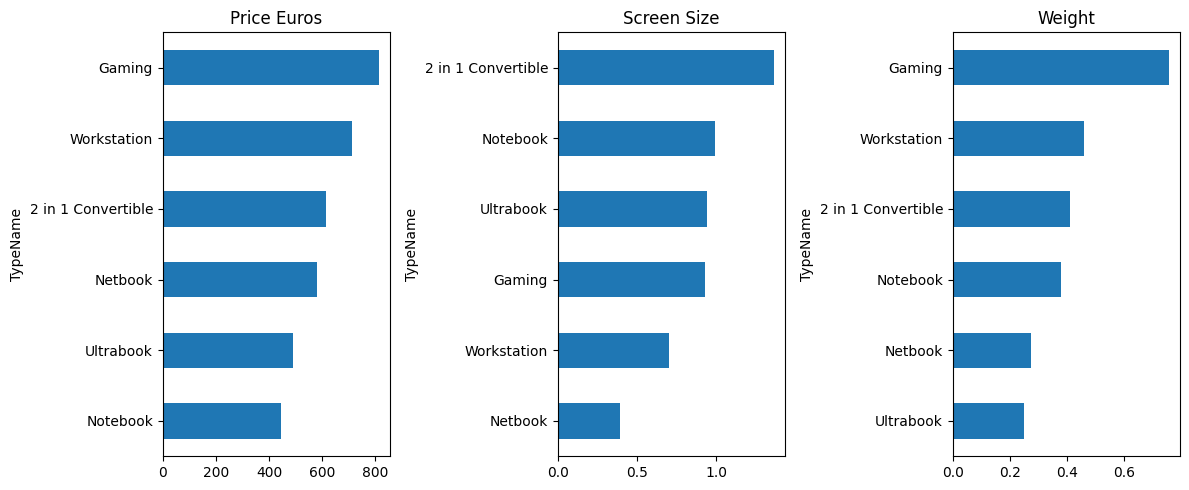

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
model_no_grp.std()["Price_euros"].sort_values().plot.barh(ax=ax[0])
model_no_grp.std()["Inches"].sort_values().plot.barh(ax=ax[1])
model_no_grp.std()["Weight"].sort_values().plot.barh(ax=ax[2])

ax[0].set_title("Price Euros")
ax[1].set_title("Screen Size")
ax[2].set_title("Weight")
plt.tight_layout()
plt.show()

* Gaming is the highest standard deviation in price euros and weight
* Netbook is the lowest standard deviation in price euros and screen size but has higher standard deviation in weight than Ultrabook
* 2 in 1 Convertible is the highest standard deviation in screen size
* Workstation is the second highest standard deviation in price euros and weight but has lower standard deviation in screen size than other except Netbook

C:\Users\dhoni\AppData\Local\Temp\ipykernel_5928\3979157088.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=0.2, linecolor="white", cmap="winter")


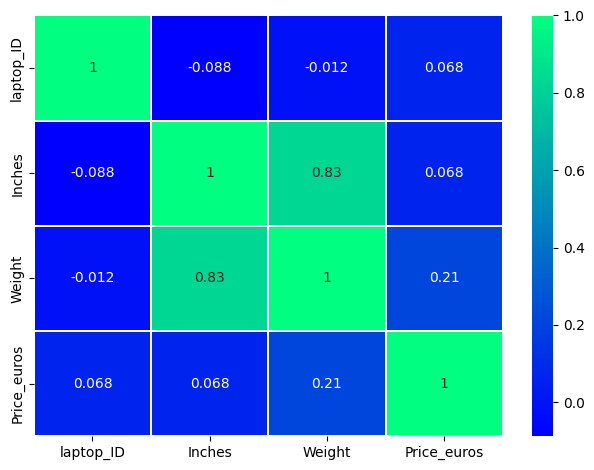

In [18]:
sns.heatmap(df.corr(), annot=True, linewidths=0.2, linecolor="white", cmap="winter")
plt.tight_layout()
plt.show()

* Laptop_ID is has weak correlation with other data
* Inches has weak correlation with price but has high correlation with weight
* Weight has weak correlation with price but still higher than inches and has high correlation with inches

<AxesSubplot: >

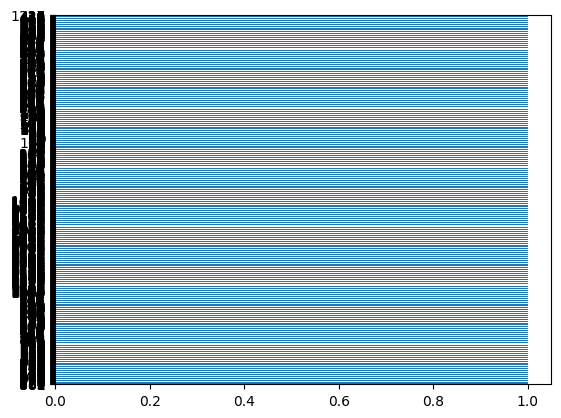

In [19]:
df["laptop_ID"].value_counts().plot.barh()

* This data have no unique values. Thats why this data has weak correlation with other data
* We dont need this data. So, we can drop this data

In [20]:
df.drop("laptop_ID", axis=1, inplace=True)

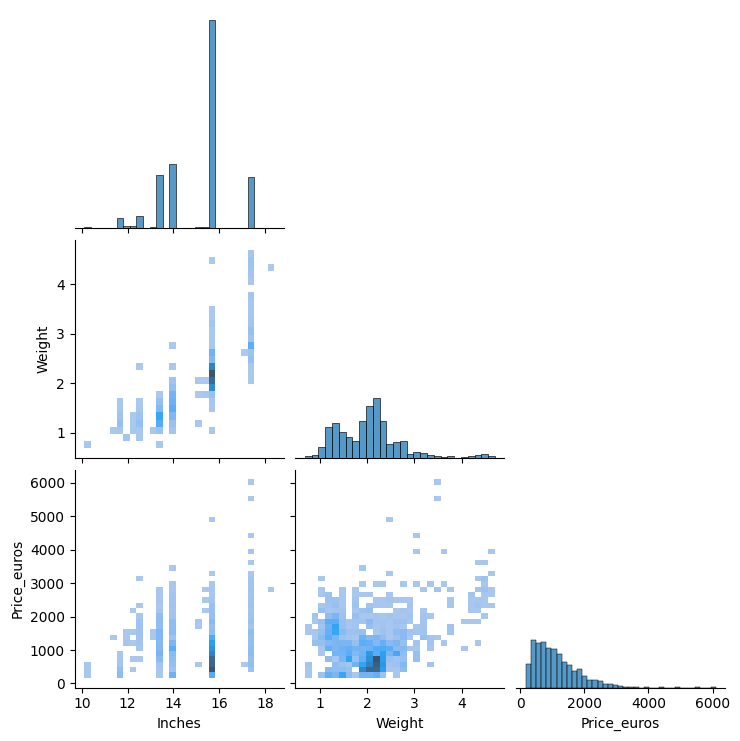

In [21]:
# Pairplot
sns.pairplot(df, corner=True, kind="hist")

* The data has positive correlation with other data
* We get the same insights as from the above heatmap. Need to confirm the same with further analysis.

In [22]:
def bar_perc(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = "{:.1f}%".format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size=12)
        

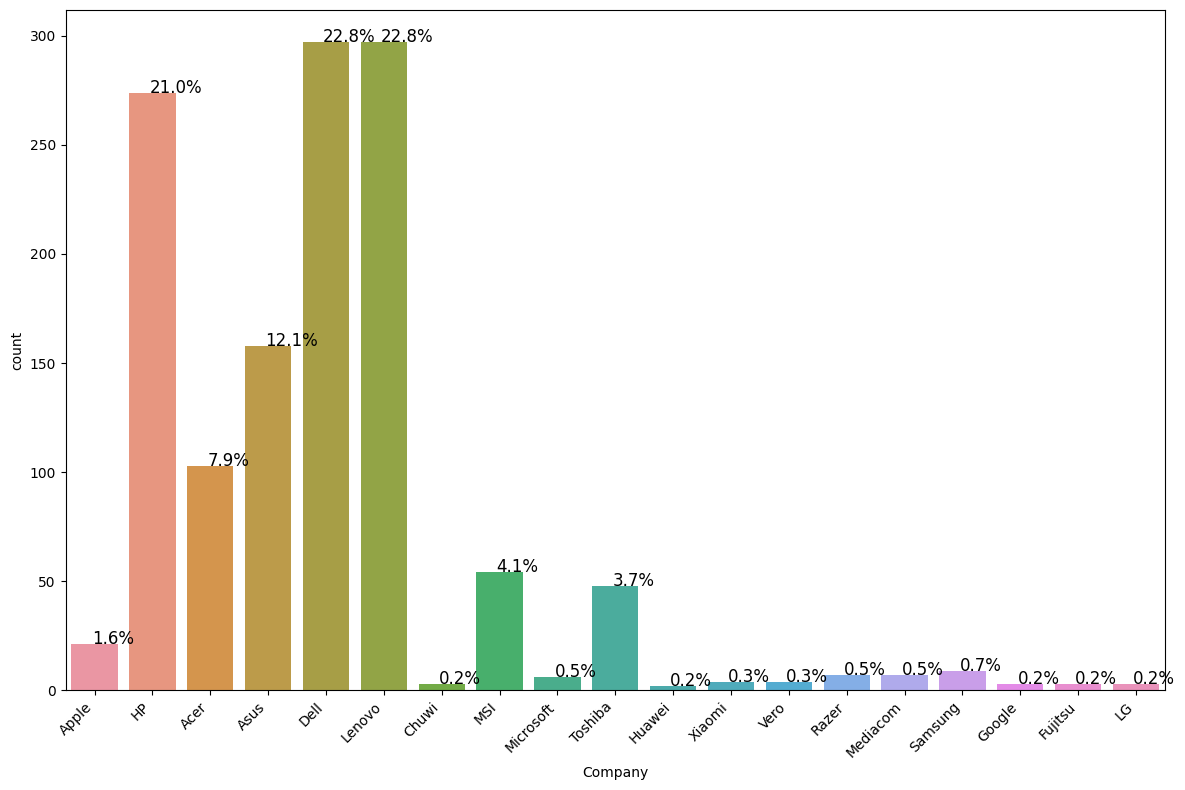

In [23]:
# Univariate Analysis of Categorical Variables
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x="Company")
bar_perc(ax, df["Company"])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")
plt.tight_layout()
plt.show()

* The company that has highest values is Dell and Lenovo
* The company that has lowest values is LG, Fujitsu, Google, Huawei, and Chuwi

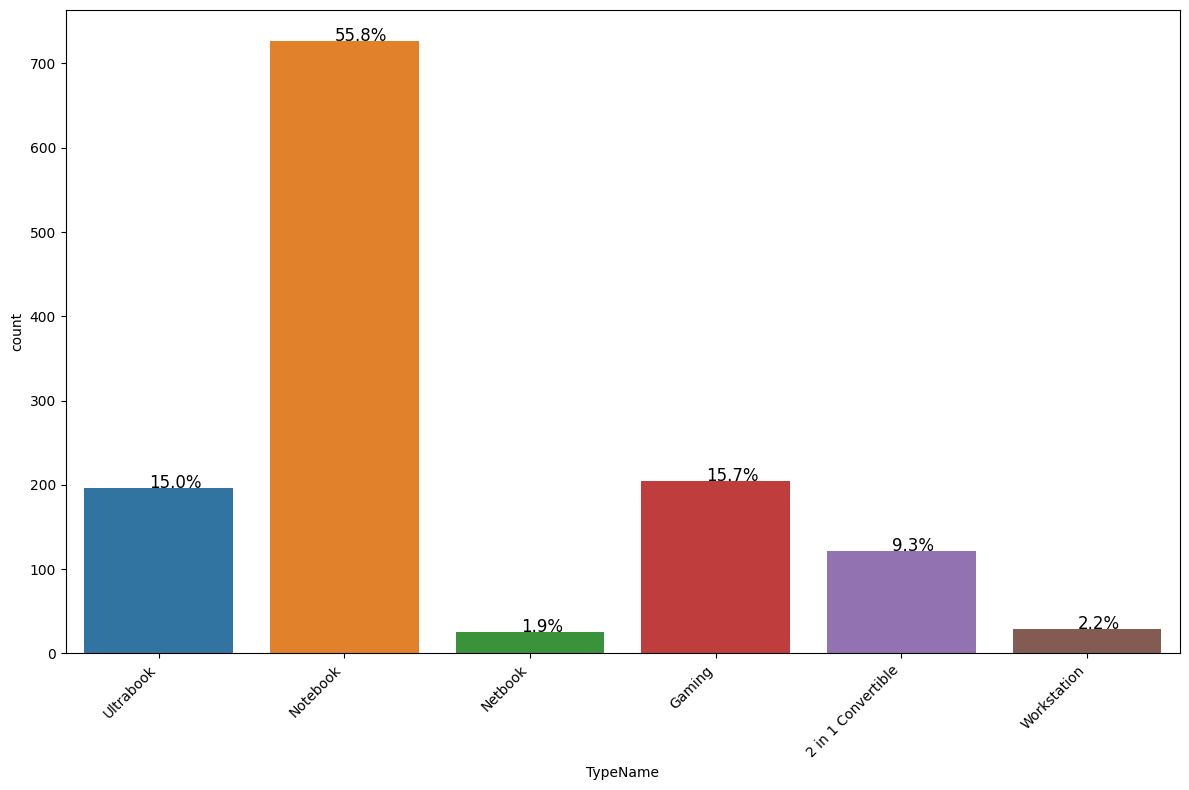

In [24]:
# Univariate Analysis of Categorical Variables
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x="TypeName")
bar_perc(ax, df["TypeName"])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")
plt.tight_layout()
plt.show()

* The data Type which is highest value is Notebook. It means, so much people buy Notebook than other
* The data Type which is lowest value is Netbook. It just 1.9 % from all data TypeName

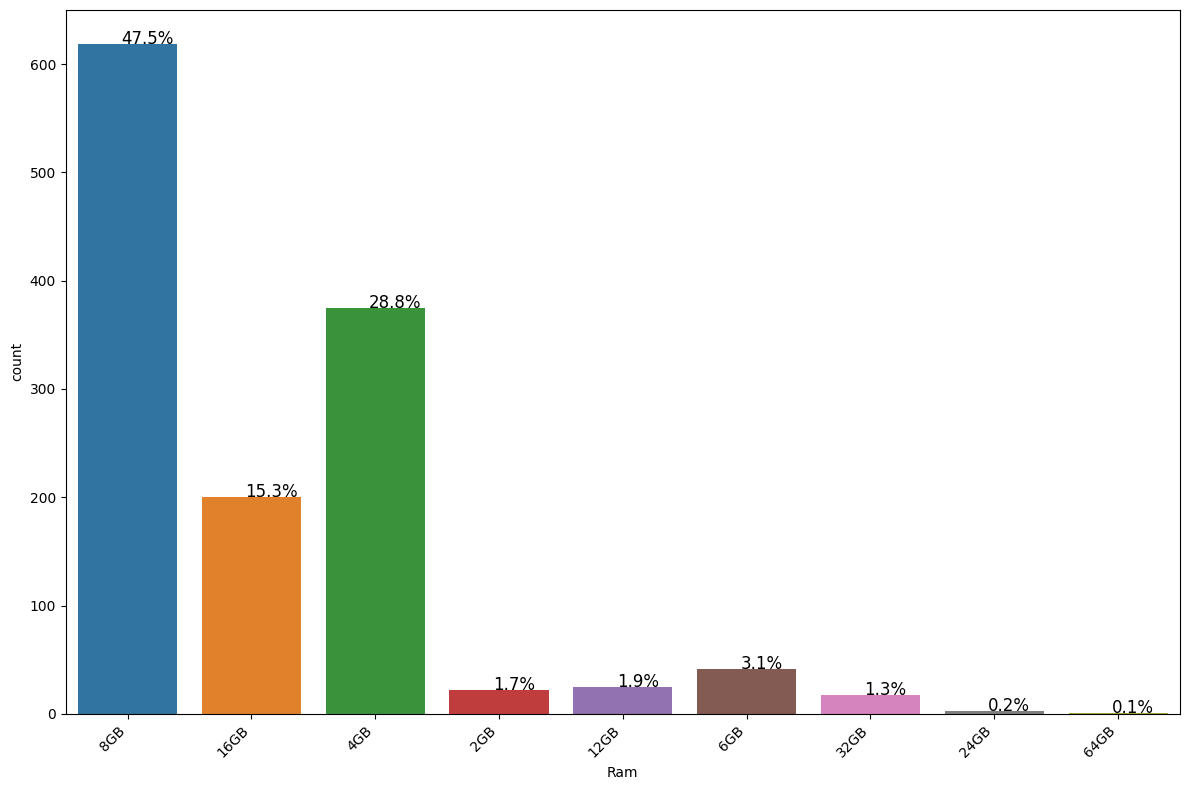

In [25]:
# Univariate Analysis of Categorical Variables
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x="Ram")
bar_perc(ax, df["Ram"])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")
plt.tight_layout()
plt.show()

* The data Ram which is highest value is 8GB. It's mean so much people use ram 8GB than other ram
* The data Ram which is lowest value is 64GB. It's 0.1 % people from all data that use 64GB

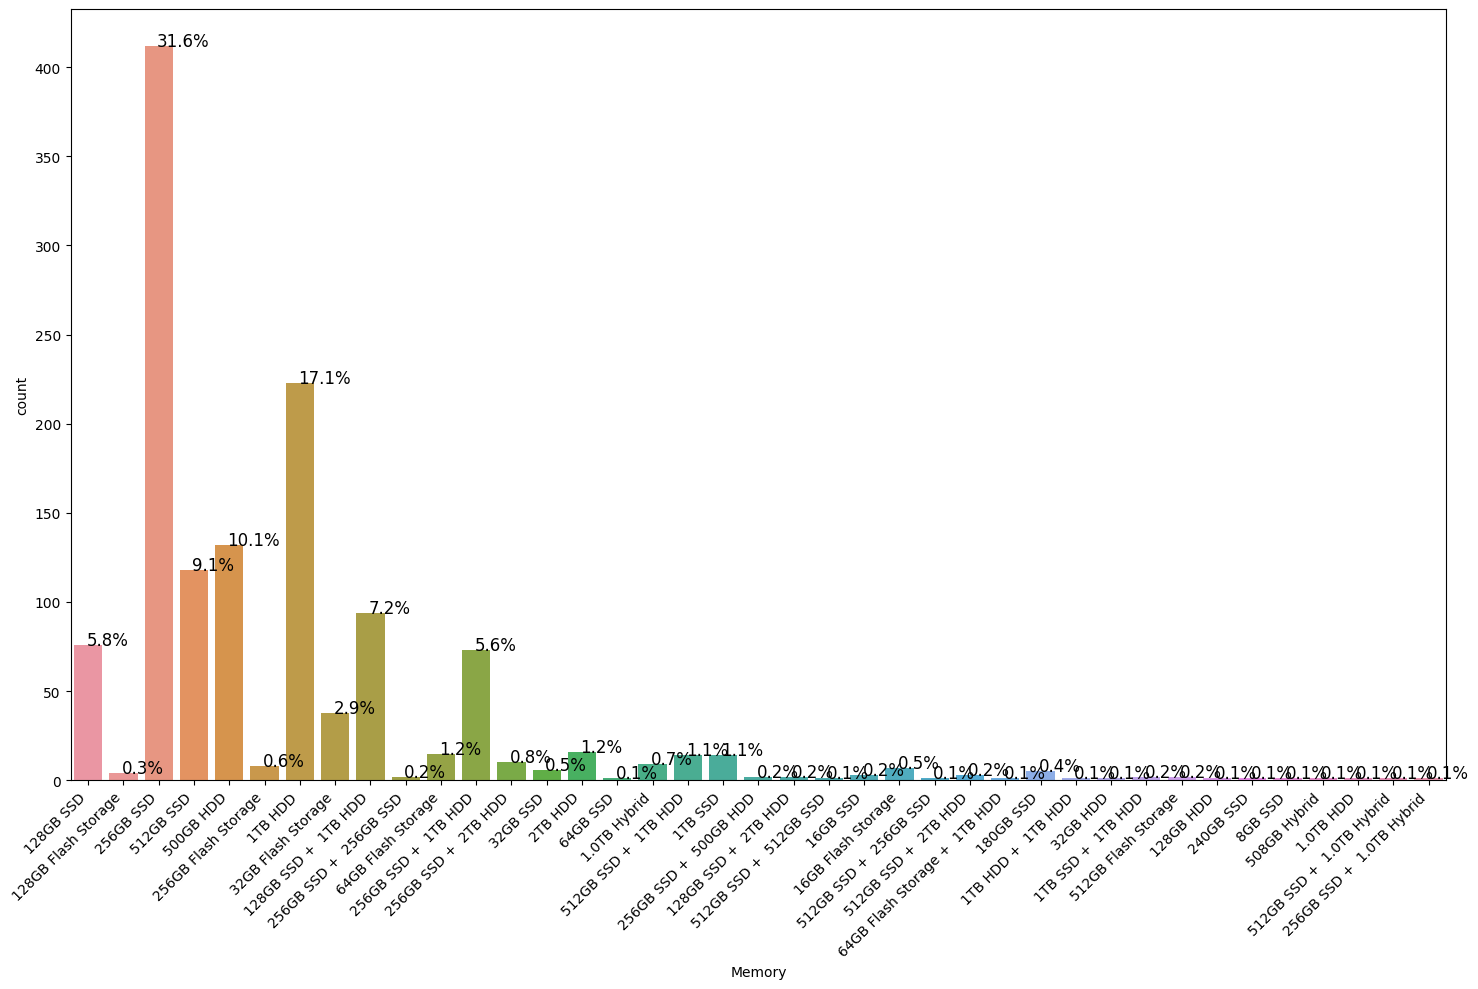

In [26]:
# Univariate Analysis of Categorical Variables
plt.figure(figsize=(15, 10))
ax = sns.countplot(data=df, x="Memory")
bar_perc(ax, df["Memory"])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")
plt.tight_layout()
plt.show()

* The data Memory which is highest value is 256GB SSD. It's mean 31.6% people from all data use 256GB SSD
* The data Memory which is lowest value is very much that has just 0.1 % data

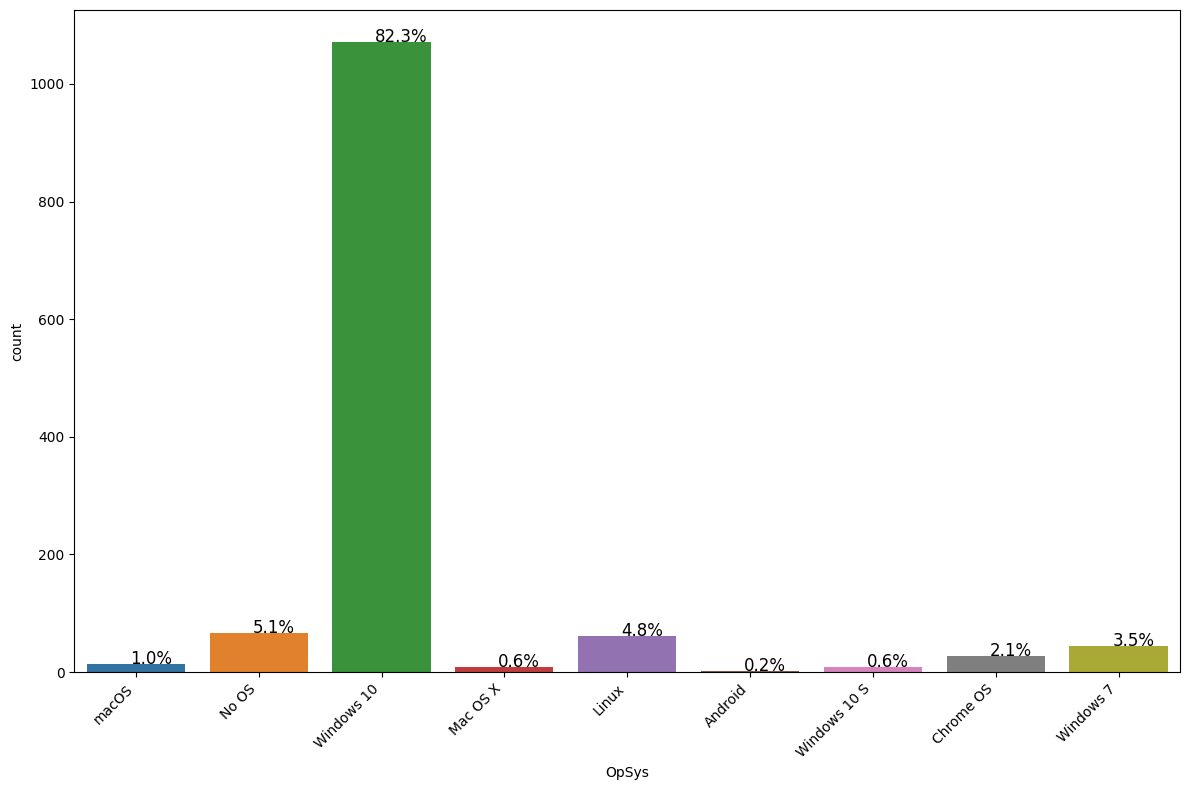

In [27]:
# Univariate Analysis of Categorical Variables
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x="OpSys")
bar_perc(ax, df["OpSys"])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")
plt.tight_layout()
plt.show()

* The data Operation System which is highest value is Windows 10. It's mean 82.3% people from all data use Windows 10
* The data Operation System which is lowest value is Android. It just 0.2 % people from all data use Android

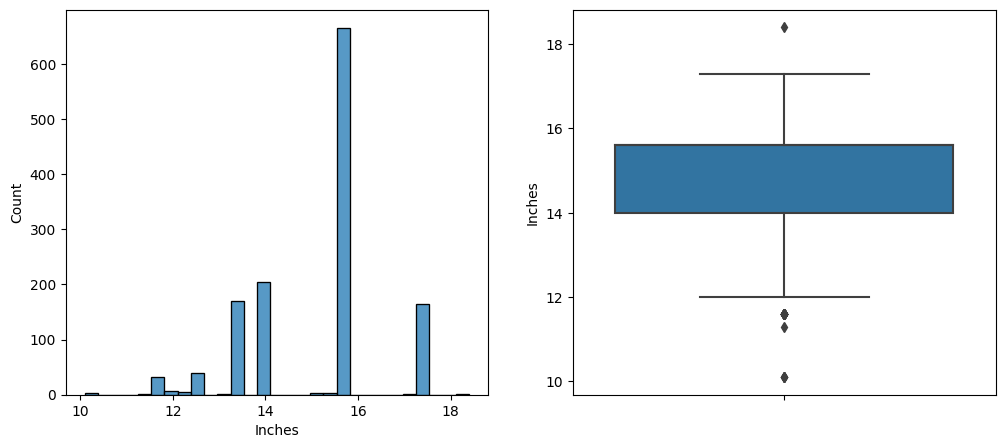

In [28]:
# Univariate Analysis for Numerical Variables

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["Inches"])
plt.subplot(1, 2, 2)
sns.boxplot(y=df["Inches"])
plt.show()

* The highest data from inches data is around 15 - 16
* Data inches has 3 low outlier and 1 high outlier
* The minimum value is 10.1 and the maximum is 18.4
* The interquartile range (IQR) is between 14 and around 15

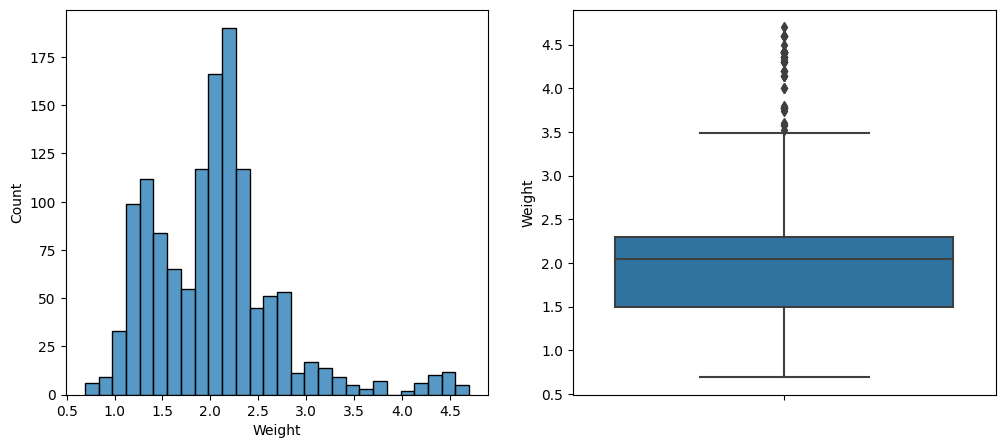

In [29]:
# Univariate Analysis for Numerical Variables

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["Weight"])
plt.subplot(1, 2, 2)
sns.boxplot(y=df["Weight"])
plt.show()

* The minimum value is 0.69 and the maximum value is 4.7
* Data has many high outlier
* The interquartile range (IQR) is between 1.5 and around 2 

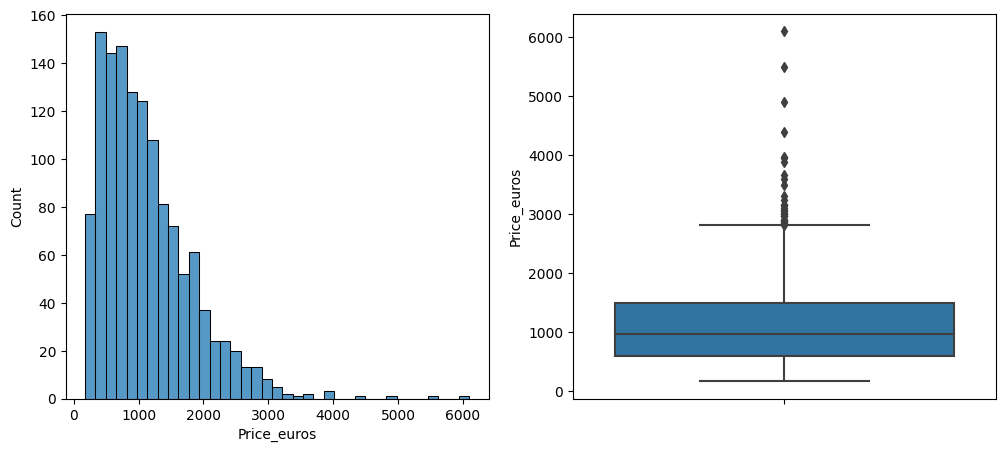

In [30]:
# Univariate Analysis for Numerical Variables

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["Price_euros"])
plt.subplot(1, 2, 2)
sns.boxplot(y=df["Price_euros"])
plt.show()

* The minimum value of data is 174.0 and the maximum value of data is 6099.0
* The highest value of data is 474 which has 174 data
* Many product that has price under 4000 euro
* Data has high outlier

C:\Users\dhoni\AppData\Local\Temp\ipykernel_5928\3677768588.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Weight", y="Inches", ci=None)


<AxesSubplot: xlabel='Weight', ylabel='Inches'>

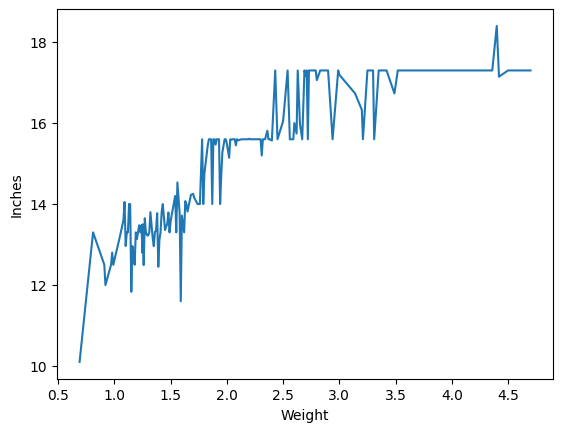

In [31]:
# Bivariate Analysis of Numerical Variables Weight vs Inches
sns.lineplot(data=df, x="Weight", y="Inches", ci=None)

* These 2 data has positive correlation 
* The bigger weight has higher inches
* Some high weight has decreased

C:\Users\dhoni\AppData\Local\Temp\ipykernel_5928\2411414964.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Weight", y="Price_euros", ci=None)


<AxesSubplot: xlabel='Weight', ylabel='Price_euros'>

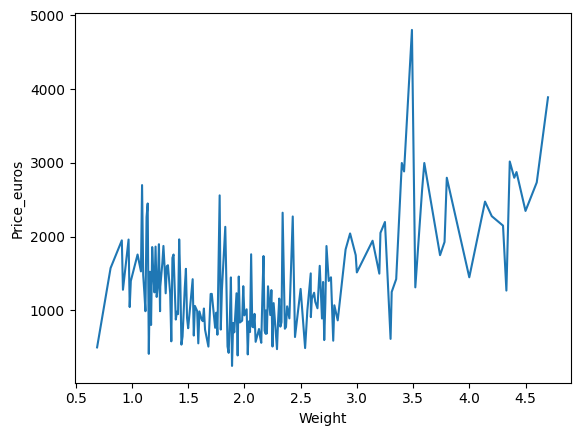

In [32]:
# Bivariate Analysis of Numerical Variables Weight vs Price
sns.lineplot(data=df, x="Weight", y="Price_euros", ci=None)

* Lots of data weight around 1.0 kg - 3.0 kg has low price
* some data has higher price with weight around 3.4kg - 3.5kg
* Data around 3kg has decreased greatly
* The maximum weight has high price which is above 3000 euro

C:\Users\dhoni\AppData\Local\Temp\ipykernel_5928\1419907666.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Inches", y="Price_euros", ci=None)


<AxesSubplot: xlabel='Inches', ylabel='Price_euros'>

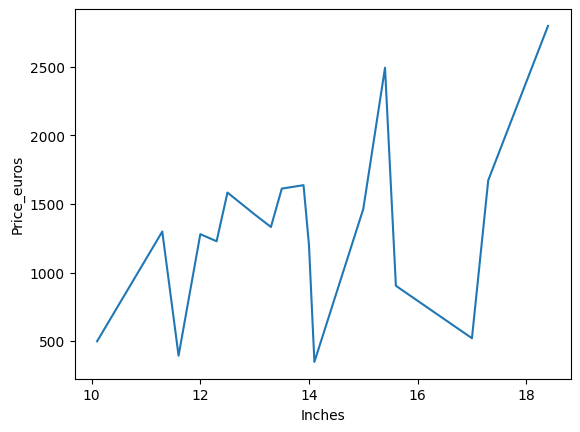

In [33]:
# Bivariate Analysis of Numerical Variables Inches vs Price
sns.lineplot(data=df, x="Inches", y="Price_euros", ci=None)

* The minimum of screen size has low price and the maximum of screen size has highest price
* Some data of screen size has low price and get decreased
* lots of data of screen size has high screen size and high price

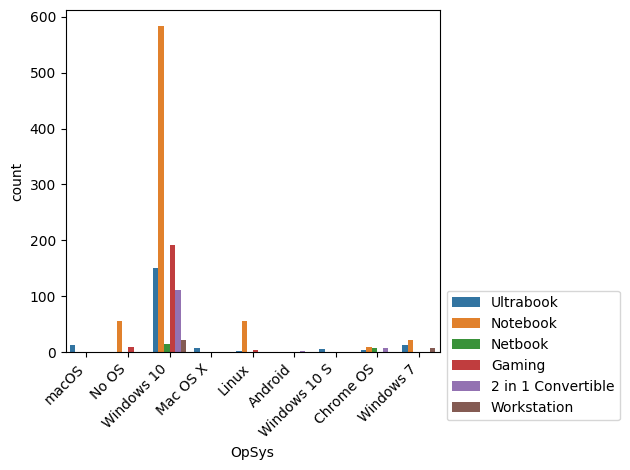

In [34]:
# Bivariate Analysis of Categorical Variables OpSys vs TypeName
ax = sns.countplot(data=df, x="OpSys", hue="TypeName")
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.tight_layout()
plt.show()

* Lots of people use Windows 10
* The highest type that people use in Windows 10 is Notebook and the lowest type that people use in Windows 10 is Netbook
* Android has just 1 type that people use and it is Workstation

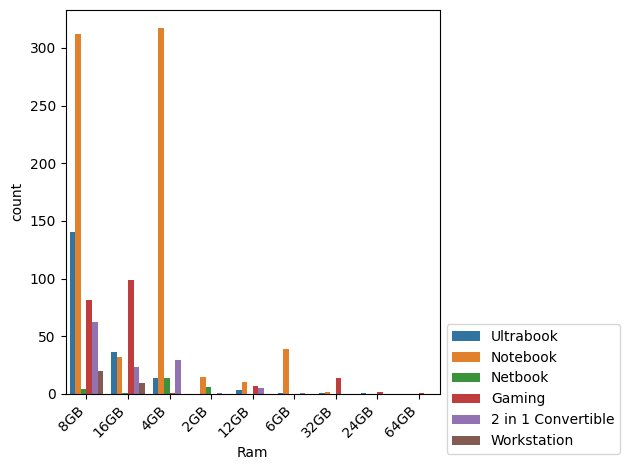

In [35]:
# Bivariate Analysis of Categorical Variables Ram vs TypeName
ax = sns.countplot(data=df, x="Ram", hue="TypeName")
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.tight_layout()
plt.show()

* Lots of people use Ram 8GB and the highest is Notebook
* The highest value is Notebook
* Lots of people that use Ram 4GB use Notebook
* People who use 64GB use Gaming type
* Lots of people who use above 16GB use Gaming type
* Lots of people who use under 16GB use Notebook

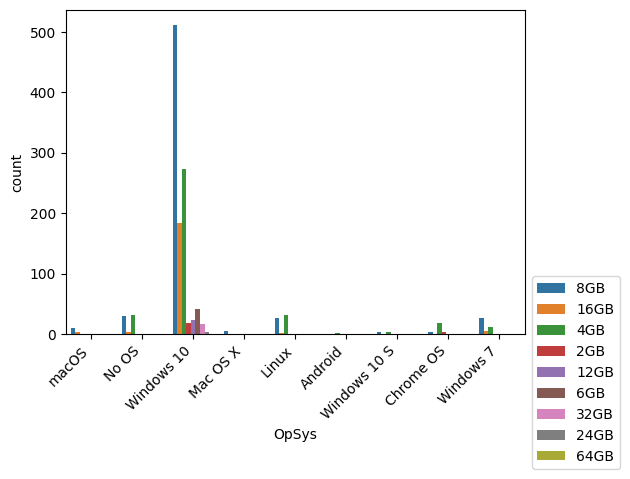

In [36]:
# Bivariate Analysis of Categorical Variables OpSys vs Ram
ax = sns.countplot(data=df, x="OpSys", hue="Ram")
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.tight_layout()
plt.show()

* Lots of people who use macOS, No OS, Windows 10, and Windows 7 prefer use 8GB than other
* Most people using Windows 10 with Ram 8GB
* The highest people who use Linux is preper use Ram 4GB than 8GB
* 1 people use Android with Ram 4GB

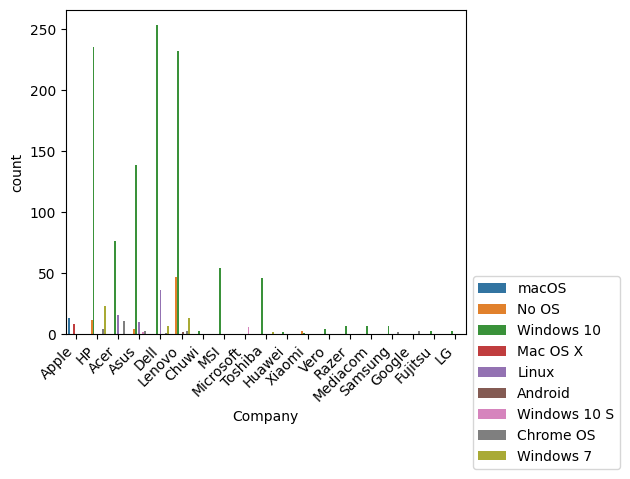

In [37]:
# Bivariate Analysis of Categorical Variables Company vs OpSys
ax = sns.countplot(data=df, x="Company", hue="OpSys")
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.tight_layout()
plt.show()

* Many companies sell Operation System Windows 10 than other Operation System
* Dell has the highest sell for Windows 10
* Lenovo has the highest sell for No OS
* Apple has the highest sell for macOS and mac OS X
* Dell has the highest sell for Linux
* Microsoft has the highest sell for Windows 10 S

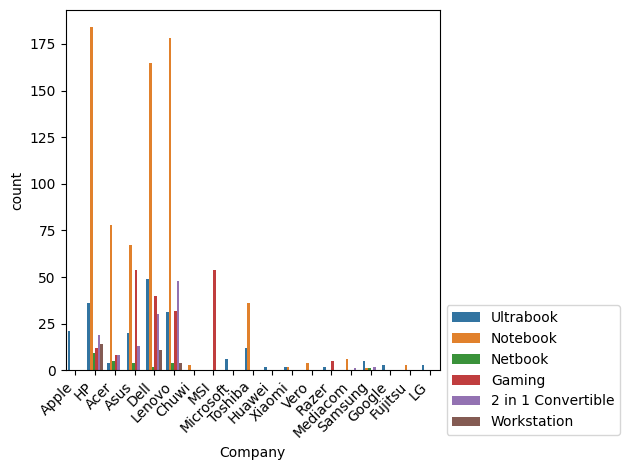

In [38]:
# Bivariate Analysis of Categorical Variables Company vs TypeName
ax = sns.countplot(data=df, x="Company", hue="TypeName")
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.tight_layout()
plt.show()

* Many companies sell type of product is Notebook
* HP company is the highest sell for type Notebook and Lenovo company is the second highest sell for type Notebook after HP company
* Apple, Microsoft, Huawei, Google, and LG company just sell for type Ultrabook
* MSL company is the highest sell for type Gaming
* Dell company is the highest sell for type Ultrabook
* Hp, Acer, Asus, Dell, Lenovo, and Samsung company sell much type of product

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), object(9)
memory usage: 122.3+ KB


In [40]:
le = LabelEncoder()
df2 = df.copy()
for i in df.columns:
    if df[i].dtypes.name == "object":
        df[i] = le.fit_transform(df[i])




In [41]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,8,4,58,8,1.37,1339.69
1,1,301,4,13.3,1,63,8,2,51,8,1.34,898.94
2,7,50,3,15.6,8,74,8,16,53,4,1.86,575.00
3,1,300,4,15.4,25,85,1,29,9,8,1.83,2537.45
4,1,300,4,13.3,23,67,8,16,59,8,1.37,1803.60


In [42]:
scaler = StandardScaler()
XX = scaler.fit_transform(df)
X = XX[:, :-1]
y = XX[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1042, 11) (261, 11) (1042,) (261,)


In [43]:
lr = LinearRegression().fit(X_train, y_train)

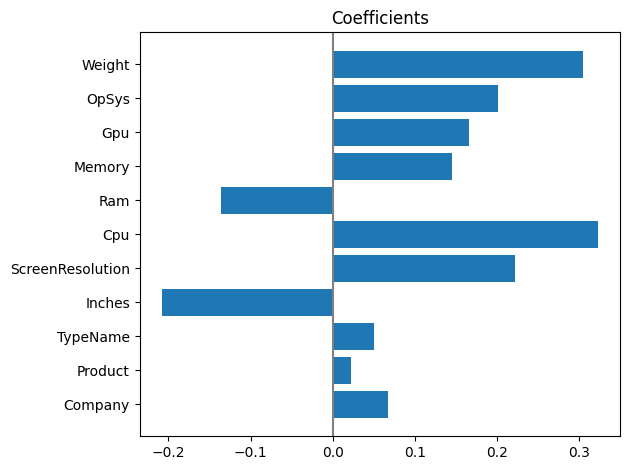

In [44]:
plt.barh(df.columns[:-1], lr.coef_.ravel())
plt.title("Coefficients")
plt.axvline(x=0, color=".5")
plt.tight_layout()
plt.show()

* Weights is the highest coefficient
* Product has no coeffient and it means product dont have any correlation with price

In [45]:
y_pred = lr.predict(X_test)
print("Coefficient of determination of training data\t :", r2_score(y_train, lr.predict(X_train)))
print("Coefficient of determination of testing data\t :", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred) ** 2)
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))


Coefficient of determination of training data	 : 0.511488134063621
Coefficient of determination of testing data	 : 0.43355621013465506
MAE 0.5224178222680951
MSE 0.5892852307133787
RMSE 0.34725708313691994
MAPE 1.9499661608880172


In [46]:
lr_params = {
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "positive": [True, False]
}
search_lr = RandomizedSearchCV(lr, lr_params, random_state=42)
search_lr.fit(X_train, y_train)

c:\Users\dhoni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'positive': [True, False]},
                   random_state=42)

In [47]:
search_lr.best_score_

0.4910831240084675

In [48]:
ridge = Ridge().fit(X_train, y_train)


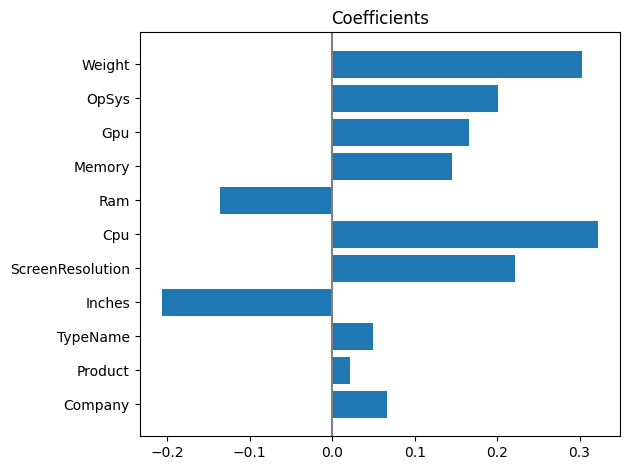

In [49]:
plt.barh(df.columns[:-1], ridge.coef_)
plt.axvline(x=0, color=".5")
plt.title("Coefficients")
plt.tight_layout()
plt.show()

In [50]:
y_pred = ridge.predict(X_test)
print("Coefficient of determination of training data\t :", r2_score(y_train, ridge.predict(X_train)))
print("Coefficient of determination of testing data\t :", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred) ** 2)
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))


Coefficient of determination of training data	 : 0.51148719445405
Coefficient of determination of testing data	 : 0.4334507749878167
MAE 0.5224937733355224
MSE 0.5893949174571326
RMSE 0.3473863687243001
MAPE 1.965246190661255


In [51]:
ridge_params = {
    "alpha": np.linspace(0.0001, 10, 1000),
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"],
    "positive": [True, False],
    "random_state": [0, 42, 101]
}
search_ridge = RandomizedSearchCV(ridge, ridge_params, random_state=42)
search_ridge.fit(X_train, y_train)

c:\Users\dhoni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dhoni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dhoni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\dhoni\AppData\Local\Programs\Python\Python39\l

RandomizedSearchCV(estimator=Ridge(),
                   param_distributions={'alpha': array([1.00000000e-04, 1.01099099e-02, 2.01198198e-02, 3.01297297e-02,
       4.01396396e-02, 5.01495495e-02, 6.01594595e-02, 7.01693694e-02,
       8.01792793e-02, 9.01891892e-02, 1.00199099e-01, 1.10209009e-01,
       1.20218919e-01, 1.30228829e-01, 1.40238739e-01, 1.50248649e-01,
       1.60258559e-01, 1.70268468e-01, 1.80278...
       9.88989099e+00, 9.89990090e+00, 9.90991081e+00, 9.91992072e+00,
       9.92993063e+00, 9.93994054e+00, 9.94995045e+00, 9.95996036e+00,
       9.96997027e+00, 9.97998018e+00, 9.98999009e+00, 1.00000000e+01]),
                                        'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'positive': [True, False],
                                        'random_state': [0, 42, 101],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga', 'lbfgs']},
                   random_state=42)

In [52]:
search_ridge.best_score_

0.49135341747346795

In [53]:
lasso = Lasso().fit(X_train, y_train)

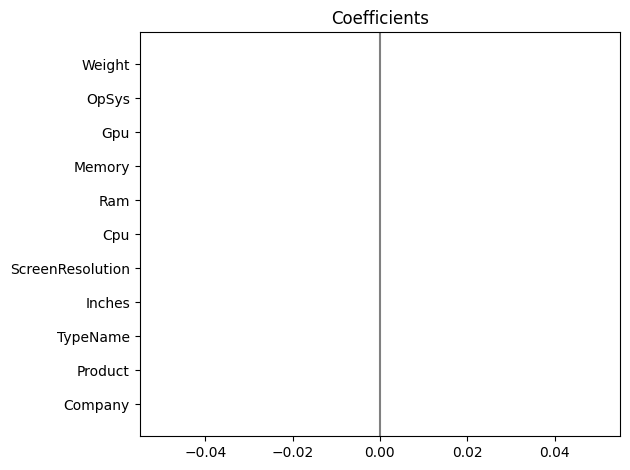

In [54]:
plt.barh(df.columns[:-1], lasso.coef_)
plt.axvline(x=0, color=".5")
plt.title("Coefficients")
plt.tight_layout()
plt.show()

In [55]:
y_pred = lasso.predict(X_test)
print("Coefficient of determination of training data\t :", r2_score(y_train, lasso.predict(X_train)))
print("Coefficient of determination of testing data\t :", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred) ** 2)
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))


Coefficient of determination of training data	 : 0.0
Coefficient of determination of testing data	 : -0.001064519883807069
MAE 0.7365197795998804
MSE 1.0414317309382826
RMSE 1.0845800502051073
MAPE 1.0588548146451986


In [56]:
lasso_params = {
    "alpha": np.linspace(0, 10, 1000),
    "fit_intercept": [True, False],
    "precompute": [True, False],
    "copy_X": [True, False],
    "warm_start": [True, False],
    "positive": [True, False],
    "random_state": [0, 42, 101],
    "selection": ["cyclic", "random"]
}
search_lasso = RandomizedSearchCV(lasso, lasso_params, random_state=42)
search_lasso.fit(X_train, y_train)

RandomizedSearchCV(estimator=Lasso(),
                   param_distributions={'alpha': array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0...
        9.85985986,  9.86986987,  9.87987988,  9.88988989,  9.8998999 ,
        9.90990991,  9.91991992,  9.92992993,  9.93993994,  9.94994995,
        9.95995996,  9.96996997,  9.97997998,  9.98998999, 10.        ]),
                                        'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'positive': [True, False],
                                        'precompute': [True, False],
                                        'random_state': [0, 42, 101],
                                        'selection': ['cyclic', 'random'],
                                        'warm_start': [True, False]},
                   random_state=42)

In [57]:
search_lasso.best_score_

-0.007227527312868709

In [58]:
svm = SVR().fit(X_train, y_train)


In [59]:
y_pred = svm.predict(X_test)
print("Coefficient of determination of training data\t :", r2_score(y_train, svm.predict(X_train)))
print("Coefficient of determination of testing data\t :", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred) ** 2)
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))


Coefficient of determination of training data	 : 0.8300207793214978
Coefficient of determination of testing data	 : 0.6324640698766956
MAE 0.3279586067724965
MSE 0.3823565537361685
RMSE 0.1461965341849995
MAPE 2.877638770254518


In [60]:
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

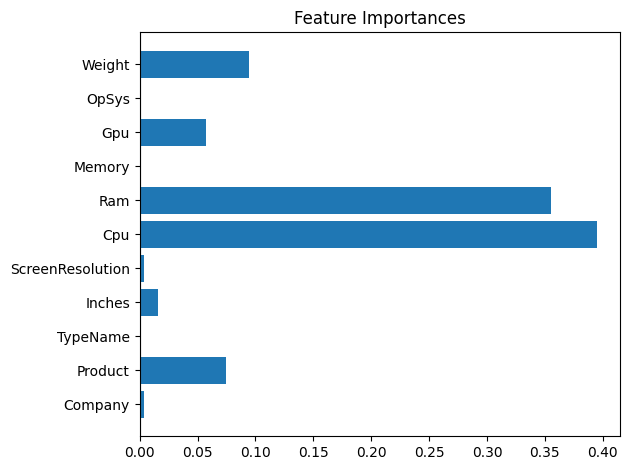

In [61]:
plt.barh(df.columns[:-1], tree.feature_importances_)
plt.axvline(x=0, color=".5")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [62]:
y_pred = tree.predict(X_test)
print("Coefficient of determination of training data\t :", r2_score(y_train, tree.predict(X_train)))
print("Coefficient of determination of testing data\t :", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred) ** 2)
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))


Coefficient of determination of training data	 : 0.7831924634068845
Coefficient of determination of testing data	 : 0.6375255962624704
MAE 0.3926914843189776
MSE 0.37709092491761936
RMSE 0.14219756565522565
MAPE 2.899262430876708


In [63]:
tree_params = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter": ["best", "random"],
    "max_depth": np.arange(50),
    "min_samples_split": np.arange(11),
    "min_samples_leaf": np.arange(11),
}
search_tree = RandomizedSearchCV(tree, tree_params, random_state=42)
search_tree.fit(X_train, y_train)

c:\Users\dhoni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dhoni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dhoni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\Users\dhoni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", lin

RandomizedSearchCV(estimator=DecisionTreeRegressor(max_depth=5,
                                                   random_state=42),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [64]:
search_tree.best_score_

0.6593896213963847

In [65]:
tree = search_tree.best_estimator_.fit(X_train, y_train)


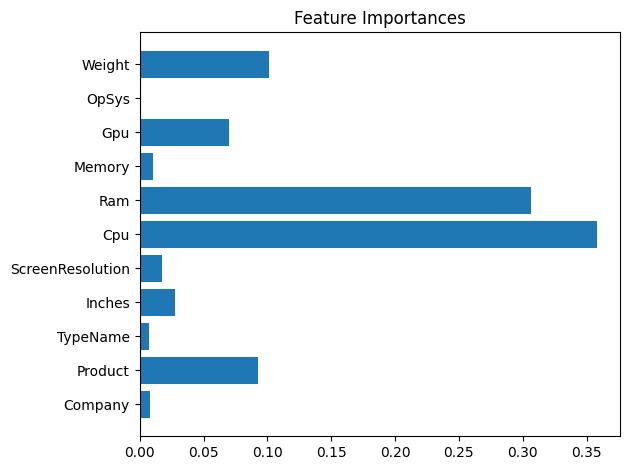

In [66]:
plt.barh(df.columns[:-1], tree.feature_importances_)
plt.axvline(x=0, color=".5")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [67]:
y_pred = tree.predict(X_test)
print("Coefficient of determination of training data\t :", r2_score(y_train, tree.predict(X_train)))
print("Coefficient of determination of testing data\t :", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred) ** 2)
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))


Coefficient of determination of training data	 : 0.863413654607475
Coefficient of determination of testing data	 : 0.6880278003786919
MAE 0.3294468854934623
MSE 0.3245522555268994
RMSE 0.10533416656759782
MAPE 3.6011086635336143


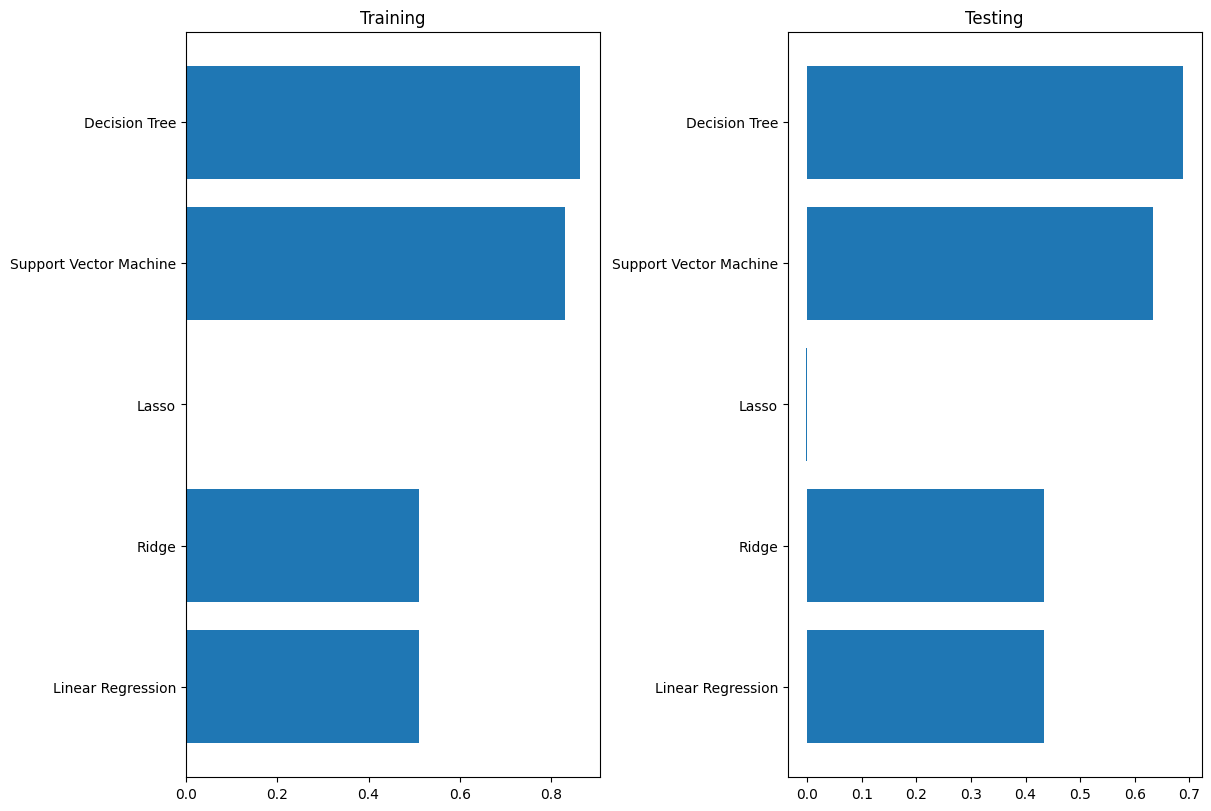

In [68]:
models = [lr, ridge, lasso, svm, tree]
model_names = ["Linear Regression", "Ridge", "Lasso", "Support Vector Machine", "Decision Tree"]
fig, ax = plt.subplots(1, 2, figsize=(12, 8), layout="constrained")
ax[0].barh([i for i in model_names], [r2_score(y_train, i.predict(X_train)) for i in models])
ax[1].barh([i for i in model_names], [r2_score(y_test, i.predict(X_test)) for i in models])

ax[0].set_title("Training")
ax[1].set_title("Testing")

plt.show()

[Text(0.48605124521072796, 0.9642857142857143, 'x[5] <= 0.259\nfriedman_mse = 0.99\nsamples = 1042\nvalue = 0.007'),
 Text(0.2739463601532567, 0.8928571428571429, 'x[6] <= 0.675\nfriedman_mse = 0.395\nsamples = 582\nvalue = -0.463'),
 Text(0.14655172413793102, 0.8214285714285714, 'x[5] <= -0.774\nfriedman_mse = 0.199\nsamples = 323\nvalue = -0.776'),
 Text(0.07471264367816093, 0.75, 'x[10] <= 0.618\nfriedman_mse = 0.12\nsamples = 183\nvalue = -0.98'),
 Text(0.06704980842911877, 0.6785714285714286, 'x[5] <= -1.31\nfriedman_mse = 0.069\nsamples = 172\nvalue = -1.016'),
 Text(0.038314176245210725, 0.6071428571428571, 'x[5] <= -2.442\nfriedman_mse = 0.031\nsamples = 111\nvalue = -1.1'),
 Text(0.01532567049808429, 0.5357142857142857, 'x[4] <= -0.663\nfriedman_mse = 0.032\nsamples = 25\nvalue = -0.911'),
 Text(0.007662835249042145, 0.4642857142857143, 'friedman_mse = 0.006\nsamples = 9\nvalue = -1.053'),
 Text(0.022988505747126436, 0.4642857142857143, 'x[8] <= -2.021\nfriedman_mse = 0.029\ns

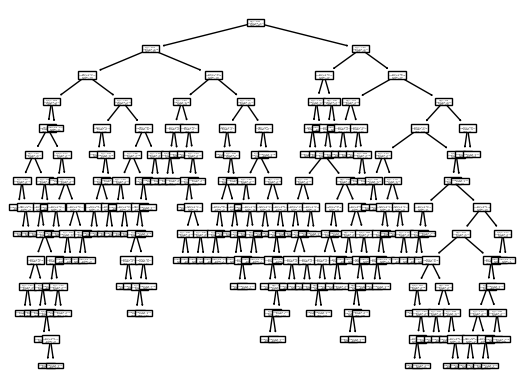

In [69]:
from sklearn.tree import plot_tree

plot_tree(tree)

In [72]:
import pickle

# Save the model as a pickle in a file
filename = "tree.sav"
pickle.dump(tree, open(filename, "wb"))
df.to_csv("laptop.csv")